In [1]:
from torchvision import datasets
import matplotlib.pyplot as plt

In [2]:
dataset_path = "data"

In [3]:
cifar10 = datasets.CIFAR10(dataset_path, train=True, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data\cifar-10-python.tar.gz to data


In [8]:
img, label = cifar10[12]

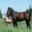

In [9]:
img

In [10]:
cifar10_val = datasets.CIFAR10(dataset_path, train=False, download=True)

Files already downloaded and verified


In [11]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

num_classes = len(class_names)
num_classes

10

#### Display all classes

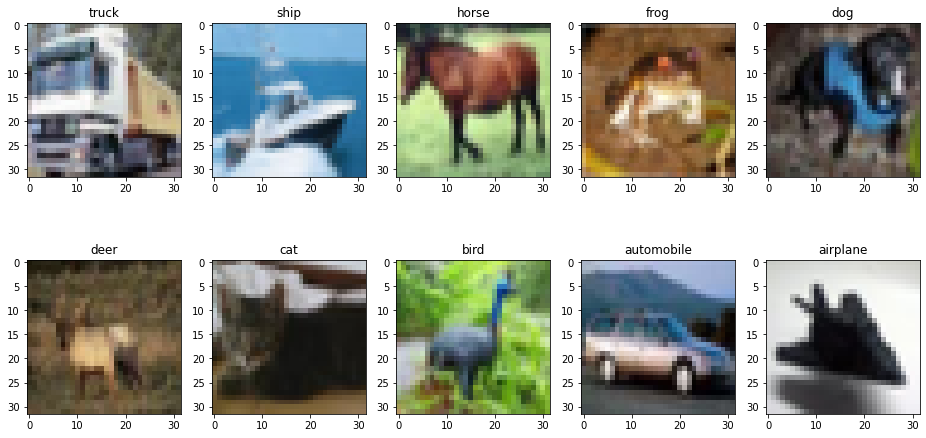

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(16, 8))

index = 9
for i in range(2):
    for j in range(5):
        axis = ax[i][j]
        img = next(img for img, label in cifar10 if label == index)
        axis.set_title(class_names[index])
        axis.imshow(img)
        index -= 1

### using transforms

In [13]:
from torchvision import transforms

In [14]:
to_tensor = transforms.ToTensor()

In [15]:
tensor_cifar10 = datasets.CIFAR10(dataset_path, train=True, download=False, transform=to_tensor)

In [16]:
img_t, label = tensor_cifar10[1]

In [17]:
tensor_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [18]:
# we can see that the values have been scaled down
img_t

tensor([[[0.6039, 0.4941, 0.4118,  ..., 0.3569, 0.3412, 0.3098],
         [0.5490, 0.5686, 0.4902,  ..., 0.3765, 0.3020, 0.2784],
         [0.5490, 0.5451, 0.4510,  ..., 0.3098, 0.2667, 0.2627],
         ...,
         [0.6863, 0.6118, 0.6039,  ..., 0.1647, 0.2392, 0.3647],
         [0.6471, 0.6118, 0.6235,  ..., 0.4039, 0.4824, 0.5137],
         [0.6392, 0.6196, 0.6392,  ..., 0.5608, 0.5608, 0.5608]],

        [[0.6941, 0.5373, 0.4078,  ..., 0.3725, 0.3529, 0.3176],
         [0.6275, 0.6000, 0.4902,  ..., 0.3882, 0.3137, 0.2863],
         [0.6078, 0.5725, 0.4510,  ..., 0.3216, 0.2745, 0.2706],
         ...,
         [0.6549, 0.6039, 0.6275,  ..., 0.1333, 0.2078, 0.3255],
         [0.6039, 0.5961, 0.6314,  ..., 0.3647, 0.4471, 0.4745],
         [0.5804, 0.5804, 0.6118,  ..., 0.5216, 0.5255, 0.5216]],

        [[0.7333, 0.5333, 0.3725,  ..., 0.2784, 0.2784, 0.2745],
         [0.6627, 0.6039, 0.4627,  ..., 0.3059, 0.2431, 0.2392],
         [0.6431, 0.5843, 0.4392,  ..., 0.2510, 0.2157, 0.

In [19]:
type(img_t)

torch.Tensor

Text(0.5, 1.0, 'truck')

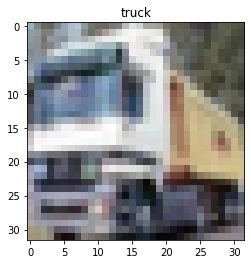

In [21]:
plt.imshow(img_t.permute(1, 2, 0))
plt.title(class)

### Normalizing the data

In [30]:
import torch

In [36]:
# the idea is to stack all the images and compute the mean and std of the dataset across each channel
img_stack = torch.stack([img_t for img_t, label in tensor_cifar10], dim=3) # dim indicates along which dimension to stack

In [37]:
img_stack.shape

torch.Size([3, 32, 32, 50000])

In [44]:
# compute mean across channels i.e wrt dim 0
mean = torch.mean(img_stack, dim=0)

In [45]:
mean.shape

torch.Size([32, 32, 50000])

Here, the mean is computed across all channels in each image.
<br> we want the mean to be computed across each channel in the entire dataset

In [46]:
# what we're doing here is that we're 'viewing' the dataset across each channel 
img_stack = img_stack.view(3, -1)

In [47]:
img_stack.shape # (no. of channels, a vector of all the values across the dataset in each channel)

torch.Size([3, 51200000])

In [48]:
mean = torch.mean(img_stack, dim=1)

In [49]:
# finally we got a mean across each channel for the entire dataset
mean

tensor([0.4914, 0.4822, 0.4465])

In [50]:
# similarly computing std
std = torch.std(img_stack, dim=1)

In [51]:
std

tensor([0.2470, 0.2435, 0.2616])

#### Composing the transformations

In [53]:
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean, std)

In [54]:
transformed_cifar10 = datasets.CIFAR10(dataset_path, train=True, download=False, 
                                       transform=transforms.Compose([
                                           to_tensor,
                                           normalize
                                       ]))

In [55]:
img_t, _ = transformed_cifar10[99]
img_t

tensor([[[-1.0050, -1.1955, -1.2590,  ...,  0.6619,  0.9159,  0.1856],
         [-0.9891, -1.1161, -1.1637,  ...,  0.5984,  0.7254,  0.3126],
         [-1.0685, -0.9732, -1.1002,  ...,  0.4396,  0.3920, -0.0366],
         ...,
         [ 0.7412,  0.2809,  0.0745,  ..., -0.4970,  0.2491,  0.2174],
         [ 0.9159,  0.3920, -0.7192,  ..., -0.7034,  0.1539,  0.2809],
         [ 1.3286,  0.9000,  0.2174,  ..., -1.0526,  0.0745,  0.6936]],

        [[-0.9495, -1.1749, -1.2716,  ...,  0.7900,  0.9833,  0.2102],
         [-0.9333, -1.1266, -1.1749,  ...,  0.7417,  0.8222,  0.3712],
         [-0.9817, -0.9172, -1.0139,  ...,  0.5162,  0.5001,  0.0813],
         ...,
         [ 0.1941, -0.2086, -1.0783,  ..., -0.7723, -0.2408, -0.2891],
         [ 0.3712, -0.0797, -0.9495,  ..., -0.8206, -0.0797,  0.0330],
         [ 0.8222,  0.4518, -0.2247,  ..., -1.1105, -0.0636,  0.5323]],

        [[-1.0474, -1.3172, -1.4222,  ..., -0.6726, -0.5677, -0.6276],
         [-1.1523, -1.3172, -1.3022,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


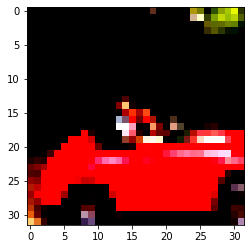

In [56]:
# our normalized image data has values in the range (-1, 1) and matplotlib clips (removes) the data
# outside the range of (0, 1) and hence the plotted image appears black in many parts
# note that this doesn't mean that the data is gone, it just isn't rendered by matplotlib
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## Classifying birds from Airplanes

In [57]:
cifar10_train = datasets.CIFAR10(dataset_path, train=True, download=False, 
                                       transform=transforms.Compose([
                                           to_tensor,
                                           normalize
                                       ]))

In [58]:
cifar10_val = datasets.CIFAR10(dataset_path, train=False, download=False, 
                                       transform=transforms.Compose([
                                           to_tensor,
                                           normalize
                                       ]))

##### Creating sub dataset of cifar10 - cifar2 consisting of birds and airplanes

In [59]:
label_map = {0: 0, 2: 1} # map cifar10 labels to cifar2 labels
class_names = ["birds", "airplanes"]
cifar2_train = [(img, label_map[label]) for img, label in cifar10_train if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

##### Building the network

In [60]:
import torch.nn as nn

In [61]:
n_out = 2

In [62]:
model = nn.Sequential(
      nn.Linear(3072, 512), # input features = 3 x 32 x 32 = 3072
      nn.Tanh(),
      nn.Linear(512, n_out)
)

##### Softmax

In [64]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [65]:
dummy_tensor = torch.tensor([1, 2, 3])

In [66]:
softmax(dummy_tensor)

tensor([0.0900, 0.2447, 0.6652])

In [67]:
softmax(dummy_tensor).sum()

tensor(1.)

In [68]:
dummy_tensor = torch.ones(2, 3)

In [69]:
dummy_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [74]:
softmax = nn.Softmax(dim=1)

In [75]:
softmax(dummy_tensor) # applying softmax along a particular dimension

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])

##### Model with Softmax

In [76]:
model = nn.Sequential(
      nn.Linear(3072, 512), # input features = 3 x 32 x 32 = 3072
      nn.Tanh(),
      nn.Linear(512, n_out),
      nn.Softmax(dim=1)
)

In [77]:
img, _ = cifar10_train[0]

In [84]:
img.shape

torch.Size([1, 3072])

In [85]:
img = img.view(-1).unsqueeze(0)

In [86]:
img

tensor([[-1.0526, -1.3066, -1.1955,  ...,  0.3918, -0.4477, -0.6276]])

In [83]:
model(img)

tensor([[0.4712, 0.5288]], grad_fn=<SoftmaxBackward0>)

##### The Loss Function

In [87]:
# model which uses Log Softmax (Log Softmax output is required for NNL loss)
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

In [88]:
loss = nn.NLLLoss()

In [89]:
img, label = cifar2_train[13]

In [90]:
out = model(img.view(-1).unsqueeze(0))

In [91]:
out

tensor([[-0.9420, -0.4940]], grad_fn=<LogSoftmaxBackward0>)

In [92]:
loss(out, torch.tensor([label]))

tensor(0.4940, grad_fn=<NllLossBackward0>)

### Training the model

In [94]:
import torch.optim as optim

In [95]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out),
    nn.LogSoftmax(dim=1)
)

In [96]:
n_epochs = 100
optimizer = optim.Adam(model.parameters())
loss = nn.NLLLoss()

##### Using dataloader to load the data in batches

In [97]:
train_dataloader = torch.utils.data.DataLoader(cifar2_train, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

In [99]:
from tqdm import tqdm

In [100]:
train_loss_list = []
val_loss_list = []
for epoch in tqdm(range(1, n_epochs)):
    
    # train
    cummulative_loss = 0
    n_batches = 0
    for imgs, labels in train_dataloader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        train_loss = loss(outputs, labels)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        cummulative_loss += train_loss.item()
        n_batches += 1
    
    loss_per_epoch = cummulative_loss / n_batches
    train_loss_list.append(loss_per_epoch)
    
    # val
    cummulative_loss_val = 0
    n_batches_val = 0
    for imgs, labels in val_dataloader:
        batch_size = imgs.shape[0]
        
        with torch.no_grad():
            outputs = model(imgs.view(batch_size, -1))
            val_loss = loss(outputs, labels) 
            
        cummulative_loss_val += val_loss.item()
        n_batches_val += 1
        
    loss_per_epoch_val = cummulative_loss_val / n_batches_val
    val_loss_list.append(loss_per_epoch_val)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [09:05<00:00,  5.51s/it]


In [101]:
len(cifar2_train) / n_batches # checking if batch size of 64 was used

63.69426751592356

In [102]:
len(cifar2_val) / n_batches_val # checking if batch size of 64 was used

62.5

Yes

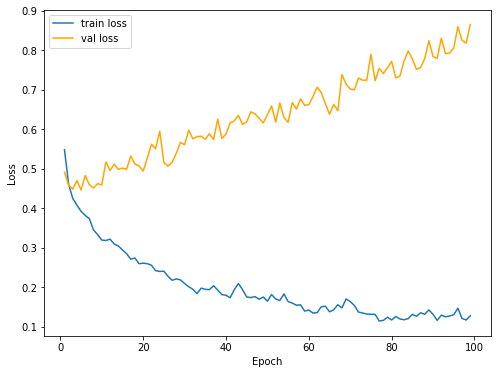

In [103]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

axes.plot(list(range(1, n_epochs)), train_loss_list, label="train loss")
axes.plot(list(range(1, n_epochs)), val_loss_list, color='orange', label="val loss")

axes.set_xlabel("Epoch")
axes.set_ylabel("Loss")

plt.legend()

##### Computing Accuracy on val set

In [107]:
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_dataloader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1) # max_value, arg_max_value
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.776


##### Adding more layers and using cross entropy loss

In [108]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, n_out)
)

In [109]:
loss =  nn.CrossEntropyLoss() 

#### Exploring Model Parameters

In [110]:
# check the number of trainable parameters in each layers
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

In [111]:
print("total trainable parameters: {}".format(sum(numel_list)))

total trainable parameters: 3737474


In [ ]:
print("Trainable Parameters layer wise")
numel_list

Trainable Parameters layer wise


[3145728, 1024, 524288, 512, 65536, 128, 256, 2]

##### reasoning

In [114]:
3072*1024 + 1024 # p.numel() is not considering the bias term hence our result varies from pytorch's.
                 # however, if you subtract the bias size (1024) you'd get the same result

3146752

In [115]:
3072*1024 # not considering the bias vector

3145728

In [116]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))